In [1]:
#Data Processing and Manulipluation 

import os
import pandas as pd
import numpy as np

In [2]:
#Lets make a heat map of the dataset

import folium
from folium import plugins
from folium.plugins import HeatMap, MousePosition

In [3]:
#Extracting LatLng From Folium Maps

from folium.features import ClickForLatLng, LatLngPopup
import clipboard

In [4]:
#Functions
cords = [0]*2

%run local_dataset.ipynb import createlocal_set()
%run data_processing.ipynb import cleanSet
%run custom_model.ipynb import model_predictions()

SEXUAL    472
ASSAULT   2182
VANDALISM 1631
B&E       5655
LARCENY   4717


In [5]:
def try_setCords():
    try:
        cords = (clipboard.paste()).split(",")
        cords[0] = float(cords[0])
        cords[1] = float(cords[1])
    
        local_set = createlocal_set(cleanSet, cords[1], cords[0])
        return cords, local_set
    
    except ValueError:
        print("Starting Value")
    except TypeError:
        print("Starting Value")
    return [0,0], cleanSet

In [6]:
def add_marker(map, cords):
    try:
        folium.Marker([cords[0], cords[1]]).add_to(map)
    except ValueError:
        folium.Marker([35.913301,-79.055265]).add_to(map)
    except IndexError:
        folium.Marker([35.913301,-79.055265]).add_to(map)
    return map

In [7]:
def DisplayHeatMap():
    cords, local_set = try_setCords()

    #Creates a heatmatrix for the crimes in the data set
    map = folium.Map(location=[35.913301,-79.055265], zoom_start = 12)

    HeatMatrix = local_set[['Latitude', 'Longitude']].values
    map.add_child(plugins.HeatMap(HeatMatrix, radius = 15))
    map = add_marker(map, cords)
    
    formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"
    MousePosition(
        position="topright",
        separator=" | ",
        empty_string="NaN",
        lng_first=True,
        num_digits=20,
        prefix="Coordinates:",
        lat_formatter=formatter,
        lng_formatter=formatter,
    ).add_to(map)
    
    map = map.add_child(ClickForLatLng(format_str='lat + "," + lng'), LatLngPopup())
    map = map.add_child( LatLngPopup() )

    display(map)
    return local_set, cords

In [8]:
def print_predictions(y_pred, accuracy):
    y_pred = y_pred*100
    data = pd.DataFrame()
    
    data['Assault'] = [y_pred[0][0]]
    data['B&E'] = [y_pred[0][1]]
    data['Laceny'] = [y_pred[0][2]]
    data['Sexual Assault'] = [y_pred[0][3]]
    data['Vandalism'] = [y_pred[0][4]]
    
    display(data)

In [10]:
local_set, cords = DisplayHeatMap()
y_pred, a, NB_matrix = model_predictions(local_set, cords, 1)
print_predictions(y_pred, a)
#35.947467,-79.048064

,Assault,B&E,Laceny,Sexual Assault,Vandalism
0,3.392572,44.821399,41.080345,1.295554,9.41013


In [11]:
y_pred, a, NB_matrix = model_predictions(local_set, cords, 0)

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def matrix_print(cnf_matrix):
    
    class_names = [0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label')

0.4128787878787879


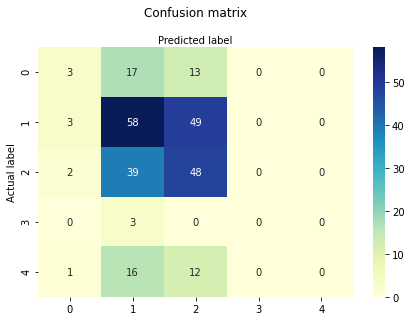

In [13]:
matrix_print(NB_matrix)
print(a)

In [14]:
len(cleanSet)

14657